<a href="https://colab.research.google.com/github/syedabusafwan/ML-practice/blob/main/Telco_Customer_Churn_Analysis_using_Classification_%26_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load and inspect the dataset**

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [31]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("denisexpsito/telco-customer-churn-ibm")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'telco-customer-churn-ibm' dataset.
Path to dataset files: /kaggle/input/telco-customer-churn-ibm


In [32]:
# Loading dataset
df = pd.read_excel('/root/.cache/kagglehub/datasets/denisexpsito/telco-customer-churn-ibm/versions/1/Customer_Churn_Dataset.xlsx')


In [33]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


In [34]:
df.shape

(7043, 23)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **Exploratory Data Analysis (EDA)**

Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

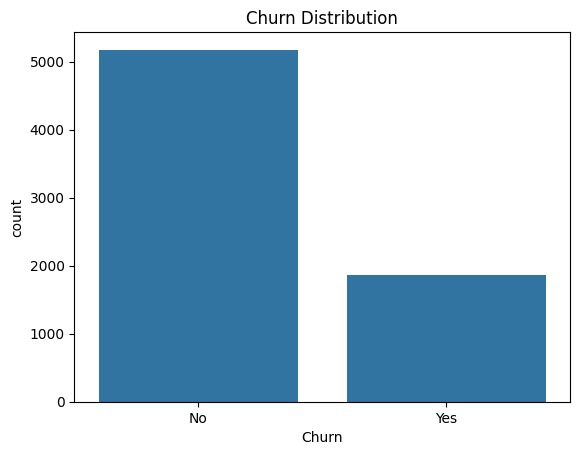

In [36]:
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()

Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

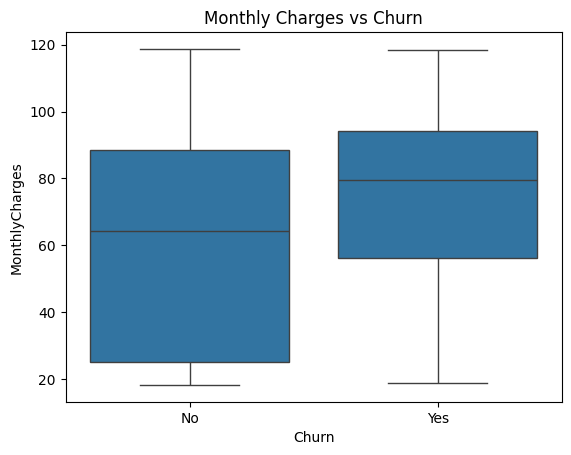

In [37]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

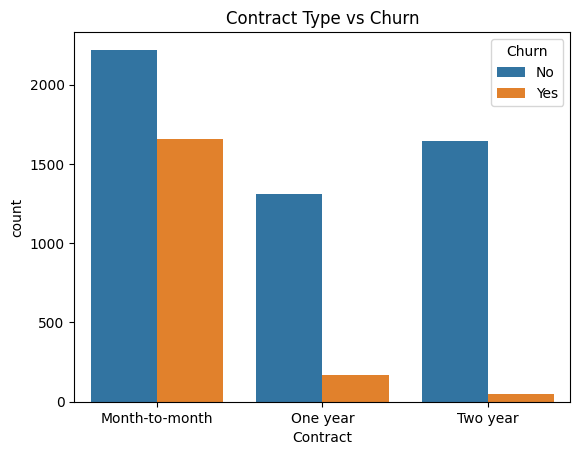

In [38]:
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Contract Type vs Churn")
plt.show()

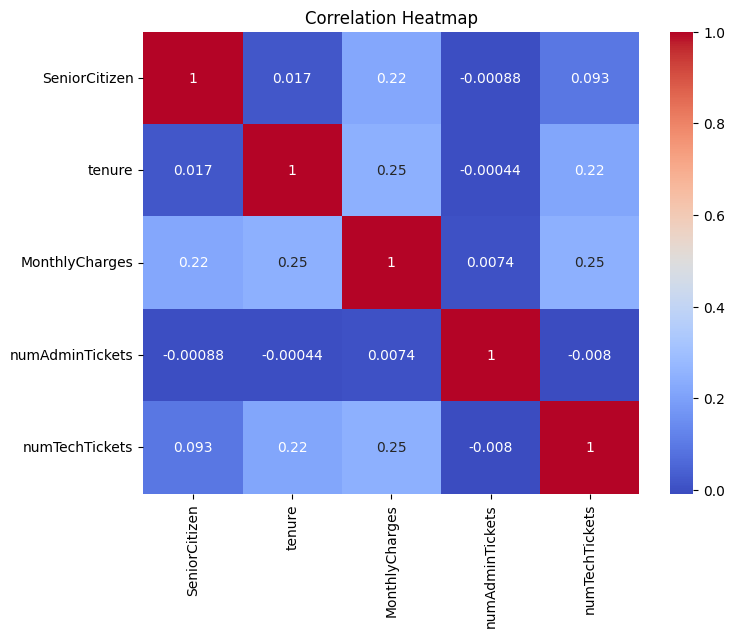

In [39]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# **Handling Missing Value**

In [40]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [41]:
# Converting TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")



In [42]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [43]:
# Filling missing values with median
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

/tmp/ipython-input-2317807955.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


In [44]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# **Feature encoding and scaling**

In [45]:
# Encoding target variable
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

In [46]:
# One-hot encoding categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

In [47]:
# Scaling numerical features
scaler = StandardScaler()
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# **Logistic Regression Model**

In [48]:
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [49]:
# Training Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [50]:
# Predictions
y_pred_log = log_model.predict(X_test)

print("First 10 Predictions:")
print(y_pred_log[:10])

First 10 Predictions:
[1 0 0 1 0 1 0 0 1 0]


# **Evaluate Classification Model**

In [51]:
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1-score:", f1_score(y_test, y_pred_log))

Accuracy: 0.8601845280340668
Precision: 0.7352941176470589
Recall: 0.7372654155495979
F1-score: 0.7362784471218207


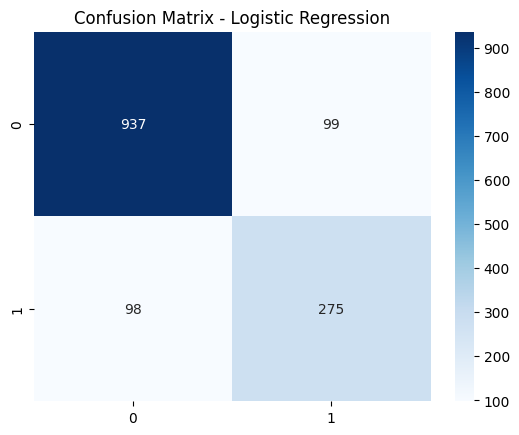

In [52]:
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# **Build and compare with Random Forest Classifier**

In [53]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [54]:
print("First 10 Predictions:")
print(y_pred_rf[:10])

First 10 Predictions:
[1 0 0 1 0 0 0 0 0 0]


In [55]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Precision:", precision_score(y_test, y_pred_rf))
print("Random Forest Recall:", recall_score(y_test, y_pred_rf))
print("Random Forest F1-score:", f1_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.8573456352022711
Random Forest Precision: 0.7866666666666666
Random Forest Recall: 0.6327077747989276
Random Forest F1-score: 0.7013372956909361


**Logistic Regression** is currently the better model for your **Churn** **Prediction** task

# **Monthly Charges Prediction**

In [56]:
X_reg = df_encoded.drop("MonthlyCharges", axis=1)
y_reg = df_encoded["MonthlyCharges"]

In [58]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

In [59]:
lin_reg = LinearRegression()
lin_reg.fit(Xr_train, yr_train)

LinearRegression()

In [61]:
yr_pred = lin_reg.predict(Xr_test)
print("First 10 Predictions:")
print(yr_pred[:10])

First 10 Predictions:
[-1.31936113 -1.32867001 -1.48947306  0.33428045 -0.49109277  0.83379726
  0.34897589  0.17519417  1.33390627 -1.4887728 ]


In [62]:
mae = mean_absolute_error(yr_test, yr_pred)
mse = mean_squared_error(yr_test, yr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(yr_test, yr_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

MAE: 0.026437425738090152
MSE: 0.0012333684451221298
RMSE: 0.03511934573881082
R² Score: 0.998766757215754


# **Business Insights & Conclusion**

**Key Churn Drivers**:

1. Month-to-month contracts

2. High monthly charges

3. Short tenure

**Business Impact**:

1. Long-term contracts reduce churn significantly

# **Final conclusion & recommendations**

**Summary**:

This analysis shows that **contract type, tenure, and monthly charges** are the strongest indicators of **churn**. We recommend the immediate deployment of the **Logistic Regression** model for identifying customers at risk of leaving. While the Random Forest is more **precise** when it makes a prediction, the Logistic Regression's ability to catch more total churners provides significantly higher business value.

**Recommendations**

1. Promote long-term contracts

2. Offer discounts to high-charge customers

3. Target new customers with retention offers

**Limitations & Future Work**

1. Class imbalance handling (SMOTE)

2. Hyperparameter tuning
